In [1]:
import tensorflow as tf
from keras import layers, models

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np

file_path = '/content/drive/My Drive/instrument_melspec_dataset.npz'
data = np.load(file_path, allow_pickle=True)

X_train = data["X_train"]
Y_train = data["Y_train"]
X_test  = data["X_test"]
Y_test  = data["Y_test"]
label_map = data["label_map"].item()

print(X_train.shape, Y_train.shape)
print(label_map)

X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

print(X_train.shape)
print(X_test.shape)

(33848, 128, 128) (33848,)
{'Accordion': 0, 'Acoustic_Guitar': 1, 'Banjo': 2, 'Bass_Guitar': 3, 'Clarinet': 4, 'cowbell': 5, 'Cymbals': 6, 'Dobro': 7, 'Drum_set': 8, 'Electro_Guitar': 9, 'Floor_Tom': 10, 'flute': 11, 'Harmonica': 12, 'Harmonium': 13, 'Hi_Hats': 14, 'Horn': 15, 'Keyboard': 16, 'Mandolin': 17, 'Organ': 18, 'Piano': 19, 'Saxophone': 20, 'Shakers': 21, 'Tambourine': 22, 'Trombone': 23, 'Trumpet': 24, 'Ukulele': 25, 'vibraphone': 26, 'Violin': 27}
(33848, 128, 128, 1)
(8463, 128, 128, 1)


In [4]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(128,128,1)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),

    layers.Dense(28, activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [6]:
model.fit(X_train,Y_train, epochs=10,validation_data=(X_test,Y_test))

Epoch 1/10
1058/1058 ━━━━━━━━━━━━━━━━━━━━ 1759s 2s/step - accuracy: 0.5723 - loss: 1.9236 - val_accuracy: 0.7756 - val_loss: 0.8165
Epoch 2/10
1058/1058 ━━━━━━━━━━━━━━━━━━━━ 1811s 2s/step - accuracy: 0.8148 - loss: 0.6237 - val_accuracy: 0.8794 - val_loss: 0.4496
Epoch 3/10
1058/1058 ━━━━━━━━━━━━━━━━━━━━ 1745s 2s/step - accuracy: 0.8666 - loss: 0.4439 - val_accuracy: 0.9271 - val_loss: 0.2659
Epoch 4/10
1058/1058 ━━━━━━━━━━━━━━━━━━━━ 1763s 2s/step - accuracy: 0.8965 - loss: 0.3388 - val_accuracy: 0.9287 - val_loss: 0.2523
Epoch 5/10
1058/1058 ━━━━━━━━━━━━━━━━━━━━ 1768s 2s/step - accuracy: 0.9189 - loss: 0.2794 - val_accuracy: 0.9394 - val_loss: 0.2422
Epoch 6/10
1058/1058 ━━━━━━━━━━━━━━━━━━━━ 1754s 2s/step - accuracy: 0.9321 - loss: 0.2327 - val_accuracy: 0.9415 - val_loss: 0.2381
Epoch 7/10
1058/1058 ━━━━━━━━━━━━━━━━━━━━ 1756s 2s/step - accuracy: 0.9401 - loss: 0.2064 - val_accuracy: 0.8779 - val_loss: 0.6673
Epoch 8/10
1058/1058 ━━━━━━━━━━━━━━━━━━━━ 1737s 2s/step - accuracy: 0.9496 -

In [7]:
y_pred = model.predict(X_test)

265/265 ━━━━━━━━━━━━━━━━━━━━ 88s 330ms/step


In [10]:
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = Y_test


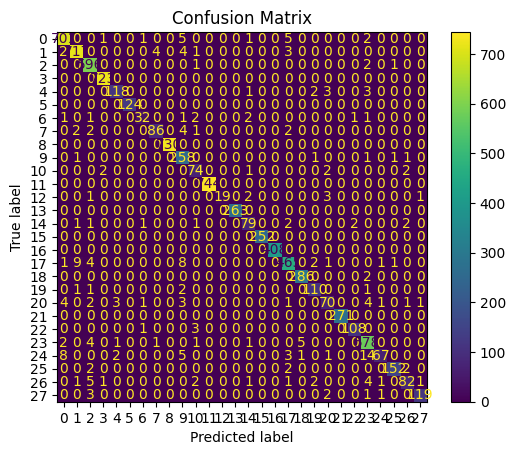

In [14]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_true_classes, y_pred_classes)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

plt.title("Confusion Matrix")
plt.show()


In [12]:
test_loss, test_accuracy = model.evaluate(X_test, Y_test, verbose=0)

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Test Loss: 0.1211
Test Accuracy: 0.9727


In [13]:
model.save("instrument_cnn_model.keras")